<a href="https://colab.research.google.com/github/7kylor/7kylor/blob/main/cars_airplaines_classification_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/TrainAI/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/TrainAI/Test'    # Update with your actual path



In [3]:

import os
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/cars')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/airplanes')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Test/cars')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/airplanes')))

67
120
50
120


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 150 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
5/5 [==============================] - 76s 14s/step - loss: 5.1476 - accuracy: 0.4400 - val_loss: 3.5867 - val_accuracy: 0.6486
Epoch 2/3
5/5 [==============================] - 62s 11s/step - loss: 2.5068 - accuracy: 0.6933 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 3/3
5/5 [==============================] - 53s 11s/step - loss: 0.7149 - accuracy: 0.6200 - val_loss: 0.0266 - val_accuracy: 0.9730


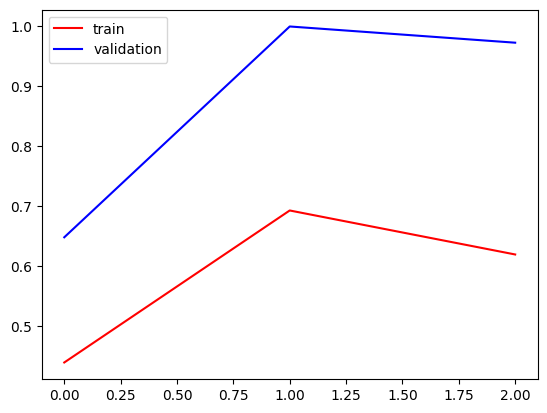

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

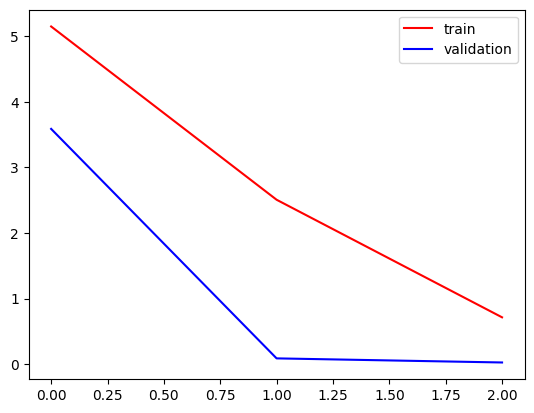

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 280 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

9/9 [==============================] - 82s 9s/step
[[0.02075604]
 [0.01036663]
 [0.00301171]
 [0.00597762]
 [0.00244851]
 [0.0045694 ]
 [0.00283616]
 [0.02728806]
 [0.00430649]
 [0.00378426]
 [0.00226107]
 [0.00399735]
 [0.00221615]
 [0.0089096 ]
 [0.27358335]
 [0.00320202]
 [0.08936718]
 [0.01471403]
 [0.00268984]
 [0.00270852]
 [0.0038887 ]
 [0.41347718]
 [0.00463767]
 [0.00313162]
 [0.00461755]
 [0.02636475]
 [0.00384486]
 [0.00443122]
 [0.00210193]
 [0.0047557 ]
 [0.00509336]
 [0.00294036]
 [0.00221398]
 [0.00233694]
 [0.00305095]
 [0.00280377]
 [0.00556751]
 [0.01077367]
 [0.9537899 ]
 [0.01135177]
 [0.01204065]
 [0.0079021 ]
 [0.00179223]
 [0.06953403]
 [0.00196111]
 [0.00355864]
 [0.00776592]
 [0.01003481]
 [0.02283841]
 [0.00325439]
 [0.00788348]
 [0.9945857 ]
 [0.3548198 ]
 [0.03024131]
 [0.00771774]
 [0.04682991]
 [0.00687421]
 [0.00229211]
 [0.00465951]
 [0.00292297]
 [0.00197313]
 [0.00764682]
 [0.45827034]
 [0.00364636]
 [0.00223327]
 [0.00357219]
 [0.00223998]
 [0.0468462

In [13]:
len(predictions)

280

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[198  32]
 [ 47   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       230
           1       0.09      0.06      0.07        50

    accuracy                           0.72       280
   macro avg       0.45      0.46      0.45       280
weighted avg       0.68      0.72      0.70       280

